<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilSG_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [7]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_excel('oil SG.xlsx')

In [9]:
df

,T,P,Sgo
0,240.0,1439.07588,0.727671
1,240.0,1523.00000,0.728360
2,240.0,1623.00000,0.729221
3,240.0,1723.00000,0.730069
4,240.0,1823.00000,0.730905
...,...,...,...
499,NaN,NaN,NaN
500,NaN,NaN,NaN
501,NaN,NaN,NaN
502,NaN,NaN,NaN


In [10]:
def fillnanP(col):
    if pd.isnull(col):
      return (df['P']!=np.NAN).mean()
    else:
      return col

In [11]:
# df['P'] = df['P'].fillna(df['P'].mean())
def fillnanT(col):
    if pd.isnull(col):
      return (df['T']!=np.NAN).mean()
    else:
      return col

In [12]:
df['P'] = df['P'].apply(fillnanP)

In [13]:
df['T'] = df['T'].apply(fillnanT)

In [14]:
df.dropna(inplace=True)

In [15]:
df.corr()

,T,P,Sgo
T,1.000000,0.521808,-0.507691
P,0.521808,1.000000,-0.414561
Sgo,-0.507691,-0.414561,1.000000


In [16]:
df.corr()['Sgo']

T     -0.507691
P     -0.414561
Sgo    1.000000
Name: Sgo, dtype: float64

<Axes: xlabel='P', ylabel='Sgo'>

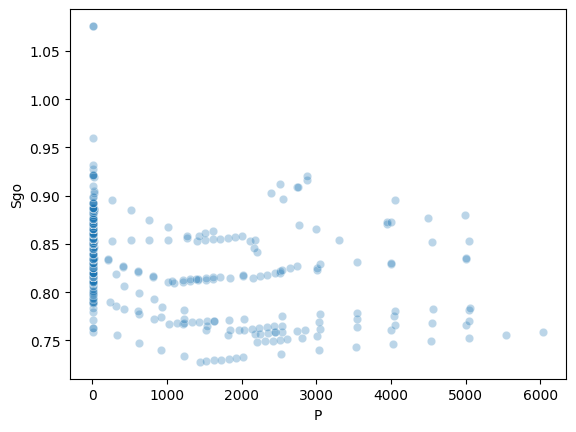

In [17]:
sns.scatterplot(data=df, x='P', y='Sgo', alpha=0.3)

<Axes: xlabel='T', ylabel='Sgo'>

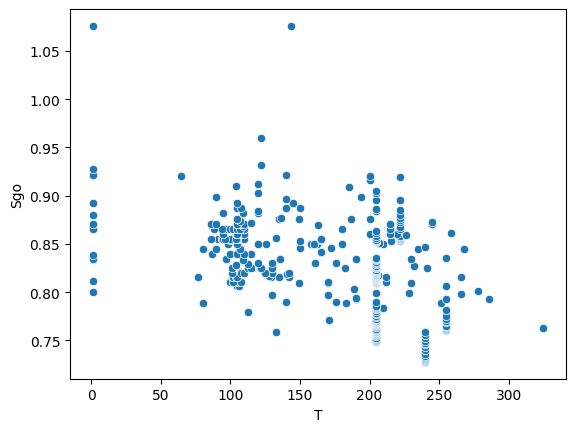

In [18]:
sns.scatterplot(data=df, x='T', y='Sgo')

<Axes: xlabel='T', ylabel='P'>

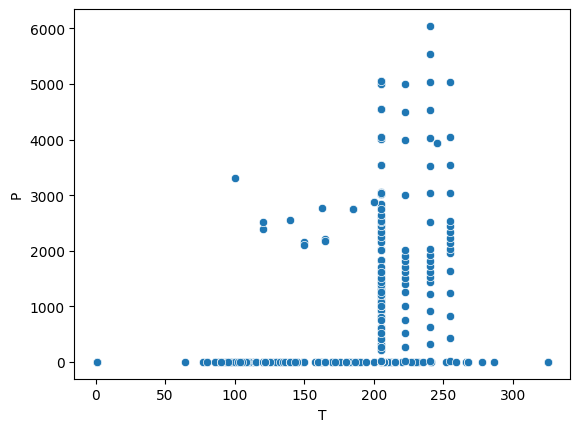

In [19]:
sns.scatterplot(data=df, x='T', y='P')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       480 non-null    float64
 1   P       480 non-null    float64
 2   Sgo     480 non-null    float64
dtypes: float64(3)
memory usage: 15.0 KB


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Sgo', axis=1), df['Sgo'], test_size=0.1, random_state=100)

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.max()

1.0

In [25]:
X_train.min()

0.0

In [26]:
X_test.max()

0.795679012345679

In [27]:
X_test.min()

0.0

In [28]:
type(X_train)

numpy.ndarray

In [29]:
# df['P'] = scaled_X[:, 1]

In [30]:
# df['T'] = scaled_X[:, 0]

In [31]:
df

,T,P,Sgo
0,240.0,1439.07588,0.727671
1,240.0,1523.00000,0.728360
2,240.0,1623.00000,0.729221
3,240.0,1723.00000,0.730069
4,240.0,1823.00000,0.730905
...,...,...,...
475,1.0,1.00000,0.927869
476,122.0,1.00000,0.932148
477,122.0,1.00000,0.959322
478,1.0,1.00000,1.076046


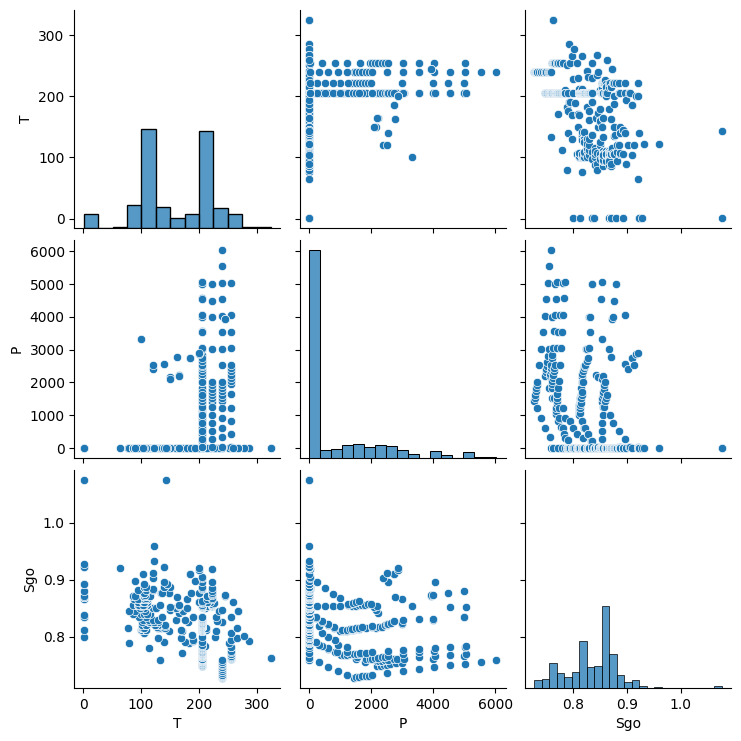

In [32]:
sns.pairplot(df)

# keras modeling

In [33]:
import scipy as sc

In [34]:
import tensorflow as tf

In [35]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [36]:
# help(Sequential)

# creat first hidden layer

In [38]:
model = Sequential([
    Dense(units=16, input_shape=(2,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
     Dense(units=1)
])

In [39]:
model

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                48        
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


#Getting Model Ready To Fit

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])

#Fitting The Model

###model.fit(x= , y= , batch_size= , epochs= ,validation_split= , shuffle= , verbose= )

In [42]:
model.fit(x=X_train,
          y=y_train,
          batch_size=300,
          validation_split=0.1,
          epochs=1000,
          #shuffle=True,
          verbose=2)

Epoch 1/1000
2/2 - 1s - loss: 1.4126 - accuracy: 0.0000e+00 - val_loss: 1.4132 - val_accuracy: 0.0000e+00 - 1s/epoch - 638ms/step
Epoch 2/1000
2/2 - 0s - loss: 1.4009 - accuracy: 0.0000e+00 - val_loss: 1.4016 - val_accuracy: 0.0000e+00 - 31ms/epoch - 16ms/step
Epoch 3/1000
2/2 - 0s - loss: 1.3893 - accuracy: 0.0000e+00 - val_loss: 1.3901 - val_accuracy: 0.0000e+00 - 30ms/epoch - 15ms/step
Epoch 4/1000
2/2 - 0s - loss: 1.3778 - accuracy: 0.0000e+00 - val_loss: 1.3786 - val_accuracy: 0.0000e+00 - 32ms/epoch - 16ms/step
Epoch 5/1000
2/2 - 0s - loss: 1.3663 - accuracy: 0.0000e+00 - val_loss: 1.3672 - val_accuracy: 0.0000e+00 - 32ms/epoch - 16ms/step
Epoch 6/1000
2/2 - 0s - loss: 1.3548 - accuracy: 0.0000e+00 - val_loss: 1.3557 - val_accuracy: 0.0000e+00 - 37ms/epoch - 18ms/step
Epoch 7/1000
2/2 - 0s - loss: 1.3433 - accuracy: 0.0000e+00 - val_loss: 1.3444 - val_accuracy: 0.0000e+00 - 32ms/epoch - 16ms/step
Epoch 8/1000
2/2 - 0s - loss: 1.3319 - accuracy: 0.0000e+00 - val_loss: 1.3330 - val

<Axes: >

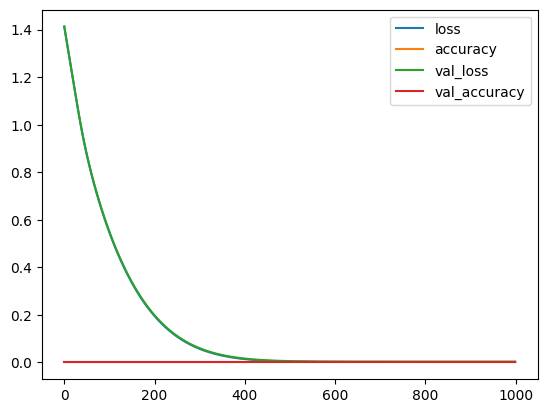

In [43]:
pd.DataFrame(model.history.history).plot()

# predict

In [44]:
predictions = model.predict(x=X_test, batch_size=100, verbose=2)

1/1 - 0s - 114ms/epoch - 114ms/step


In [ ]:
predictions

In [46]:
predictions.shape

(48, 1)

In [47]:
y_test.shape

(48,)

#evaluate

In [48]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0000e+00


[0.0011737083550542593, 0.0]

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test.values, predictions)
mse

In [50]:
mean_absolute_error(y_test.values, predictions)

0.02905836015382014

In [51]:
#  rmse = np.sqrt(mean_squared_error(y_test.values, predictions))
rmse = mean_squared_error(y_test.values, predictions, squared =False)
rmse

0.034259434009666696

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test.round(), predictions.round(), normalize=False)

# visualization

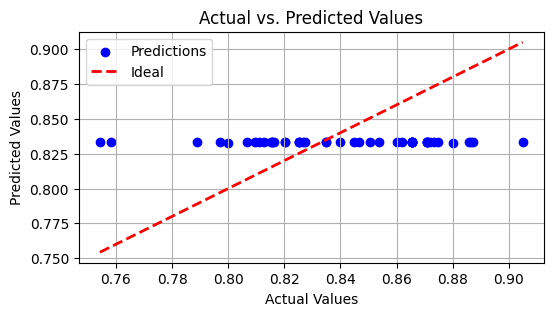

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

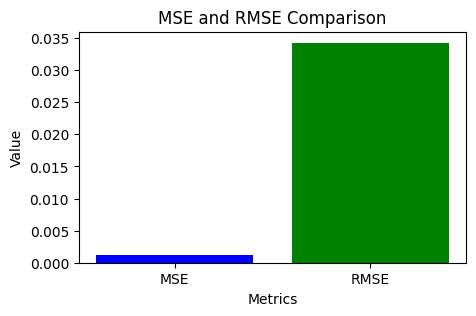

In [53]:
# Create labels and values for the bar plot
metrics = ['MSE', 'RMSE']
values = [mse, rmse]

# Plotting the bar plot
plt.figure(figsize=(5,3))
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('MSE and RMSE Comparison')
plt.show()